In [ ]:
'''
Name: Subash Gupta Karamsetty
Znumber: Z23689645
Assignment Number: 11
Professor: Dr. Ghoraani

This is my Colab file link:
https://colab.research.google.com/drive/1vHxSdpi8M1R8X0NdOftRiRm495rSn8qI
'''

# **Importing all the required modules**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation
from keras.models import Sequential, Model, load_model
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

In [2]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data() #Loading the cifar10 dataset from keras.datasets
classes = np.arange(10)

170498071/170498071 [==============================] - 5s 0us/step


# **A. Randomizing the training dataset and dividing them into the training and validation dataset in 80%-20% combination**

In [3]:
indexes = np.arange(0,x_train.shape[0]) #creating a range array starting from 0 to training dataset images count.
x_train_random_indexes = np.random.permutation(indexes) #using the random function to randomize the images (using indexes).

x_train = x_train[x_train_random_indexes, : , :, :] #restructuring the new training dataset images with the randomized indexes.
y_train = y_train[x_train_random_indexes]        #restructuring the new training dataset labels respectively with the randomized indexes.
print("After ramdomizing, the training samples shape is : ",x_train.shape,y_train.shape)
sizes = int(x_train.shape[0]*0.2)
x_val = x_train[:sizes, : , :, :] #considering the 20% samples as validation dataset (This includes random images since randamized already)
y_val = y_train[:sizes]
print("The first 20% samples cosnidered as validation set : ",x_val.shape, y_val.shape)

x_train = x_train[sizes:, : , :, :] #considering the remaining samples as the training dataset.
y_train = y_train[sizes:]
print("The remaining will be the training set : ",x_train.shape, y_train.shape)

After ramdomizing, the training samples shape is :  (50000, 32, 32, 3) (50000, 1)
The first 20% samples cosnidered as validation set :  (10000, 32, 32, 3) (10000, 1)
The remaining will be the training set :  (40000, 32, 32, 3) (40000, 1)


# **B. Lets scale the pixel values between 0 and 1, by dividing them by 255.**

In [4]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_val/=255
x_test/=255

# **C. Labels to binary matrix using to_categorical**

In [5]:
y_train_c = to_categorical(y_train, len(classes)) #converting the labels to categorical form.
y_test_c = to_categorical(y_test, len(classes))
y_val_c = to_categorical(y_val, len(classes))

# **D. Constructing 1st CNN**

In [6]:
model1 = Sequential()  #Selected a sequential model
#First Convolution Block
model1.add(Conv2D(filters = 32, kernel_size=(3,3), padding = "valid", activation='relu', input_shape =x_train.shape[1:]))
model1.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

#Second Convolution Block
model1.add(Conv2D(filters = 64, kernel_size=(3,3), padding = "valid", activation='relu', input_shape =x_train.shape[1:]))
model1.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

#Flattening layer
model1.add(Flatten())

#Fully connected layer
model1.add(Dense(units = 512, activation='relu'))
model1.add(Dropout(0.5))

#Output layer
model1.add(Dense(units = len(classes), activation = 'softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

# **E. Compile, train, and then evaluate**

In [7]:
def plot_curves(history): #the plot function which will plot the Training and Validation Loss plot in a single plot
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss V/s Validation Loss')
    plt.plot(history.history['loss'], label = 'Training Loss')
    plt.plot(history.history['val_loss'], label = 'Validation Loss')
    plt.legend()
    plt.show()

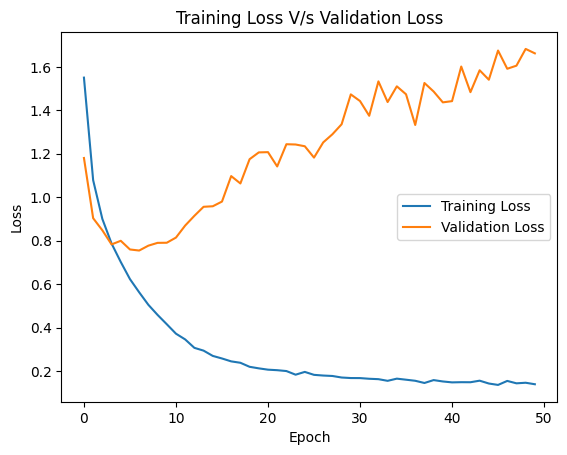

***************************************************************************************************************************************************************************************************
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0207 - accuracy: 0.9938
Training Loss: 0.020686829462647438
Training Accuracy: 0.9937999844551086
***************************************************************************************************************************************************************************************************
313/313 [==============================] - 1s 3ms/step - loss: 1.6618 - accuracy: 0.7466
Validation Loss: 1.6618245840072632
Validation Accuracy: 0.7465999722480774
***************************************************************************************************************************************************************************************************


In [8]:
#Compile
model1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

#Checkpoint
checkpoint = ModelCheckpoint('myBestModel.A11', save_best_only=True, monitor='val_loss', mode='min', verbose=0)

#fitting the model
history = model1.fit(x_train, y_train_c, batch_size=32, epochs=50, verbose = 0, validation_data = (x_val, y_val_c), callbacks = [checkpoint])

#Plotting the losses
plot_curves(history)
print("***"*65)
#evaluating the model and obtaining the training and the testing losses and accuracy's
train_scores = model1.evaluate(x_train, y_train_c)
print("Training Loss:", train_scores[0])
print("Training Accuracy:", train_scores[1])
print("***"*65)
val_scores = model1.evaluate(x_val, y_val_c)
print("Validation Loss:", val_scores[0])
print("Validation Accuracy:", val_scores[1])
print("***"*65)

# **F. 2nd model and its evaluation with Image Data Generator**

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#First Convolution Block
model2 = Sequential() #Selected a sequential model
model2.add(Conv2D(filters = 32, kernel_size=(3,3), padding = "valid", activation='relu', input_shape =x_train.shape[1:]))
model2.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

#Second Convolution Block
model2.add(Conv2D(filters = 64, kernel_size=(3,3), padding = "valid", activation='relu', input_shape =x_train.shape[1:]))
model2.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

#Flattening layer
model2.add(Flatten())

#Fully connected layer
model2.add(Dense(units = 512, activation='relu'))
model2.add(Dropout(0.5))

#Output layer
model2.add(Dense(units = len(classes), activation = 'softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

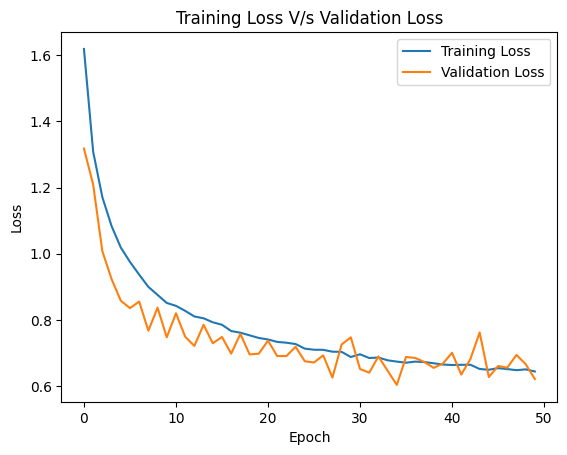

***************************************************************************************************************************************************************************************************
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4767 - accuracy: 0.8317
Training Loss: 0.47670987248420715
Training Accuracy: 0.8317000269889832
***************************************************************************************************************************************************************************************************
313/313 [==============================] - 1s 3ms/step - loss: 0.6222 - accuracy: 0.7896
Validation Loss: 0.6221884489059448
Validation Accuracy: 0.7896000146865845
***************************************************************************************************************************************************************************************************


In [10]:
#Compile
model2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

#Checkpoint
checkpoint = ModelCheckpoint('myBestModel2.A11', save_best_only=True, monitor='val_loss', mode='min', verbose=0)

#ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=10, horizontal_flip = True, width_shift_range=0.1, height_shift_range=0.1) #Considered all the 4 conditions
datagen.fit(x_train) #fitting x_train data accordingly.

#fitting the model
history = model2.fit(datagen.flow(x_train, y_train_c, batch_size=32),
                     steps_per_epoch = len(x_train)/32, epochs=50, verbose = 0,
                     validation_data = (x_val, y_val_c), callbacks = [checkpoint])

#Plotting the losses
plot_curves(history)
print("***"*65)
#evaluating the model and obtaining the training and the testing losses and accuracy's
train_scores = model2.evaluate(x_train, y_train_c)
print("Training Loss:", train_scores[0])
print("Training Accuracy:", train_scores[1])
print("***"*65)
val_scores = model2.evaluate(x_val, y_val_c)
print("Validation Loss:", val_scores[0])
print("Validation Accuracy:", val_scores[1])
print("***"*65)

# **G. What do you observe from the validation loss in both step (e) and (f)? Is the model overfitting or underfitting the training data? Explain.**
 In Model 1, the validation loss significantly diverges from the training loss, indicating a clear sign of overfitting. This discrepancy suggests that the model performs well on the training data but fails to generalize to unseen validation data, resulting in poor validation loss values. The behavior observed in the graph of training and validation losses further supports this conclusion, with the validation loss exhibiting substantial fluctuations and eventually increasing.

In Model 2, where data augmentation was employed to create different variations of the images, the validation loss aligns much more closely with the training loss. This convergence implies improved generalization capability, as the model demonstrates consistent performance across both training and validation datasets. The gradual decrease in both training and validation losses, as depicted in the graph, indicates effective learning and adaptation of the model to the dataset without suffering from significant overfitting.

In summary, Model 1 is overfitting the training data, as evidenced by the substantial gap between training and validation losses and an increase in the validation losses, while Model 2 shows improved performance and generalization, suggesting a reduction in overfitting due to the incorporation of data augmentation techniques.

# **H. A new model with additional batch normalization layers**

In [17]:
model3 = Sequential() #Selected a sequential model

#First Convolution Block
model3.add(Conv2D(filters = 32, kernel_size=(3,3), padding = "valid", activation='relu', input_shape =x_train.shape[1:], use_bias=False)) #As using BatchNormalization we are removing the bias.
model3.add(BatchNormalization()) #BatchNormalization layer
model3.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', use_bias=False))
model3.add(BatchNormalization()) #BatchNormalization layer
model3.add(MaxPooling2D(pool_size=(2,2)))

#Second Convolution Block
model3.add(Conv2D(filters = 64, kernel_size=(3,3), padding = "valid", activation='relu', input_shape =x_train.shape[1:], use_bias=False))
model3.add(BatchNormalization()) #BatchNormalization layer
model3.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', use_bias=False))
model3.add(BatchNormalization()) #BatchNormalization layer
model3.add(MaxPooling2D(pool_size=(2,2)))

#Flattening layer
model3.add(Flatten())

#Fully connected layer
model3.add(Dense(units = 512, activation='relu'))
model3.add(BatchNormalization()) #BatchNormalization layer
model3.add(Dropout(0.5))

#Output layer
model3.add(Dense(units = len(classes), activation='softmax'))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        864       
                                                                 
 batch_normalization_18 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        9216      
                                                                 
 batch_normalization_19 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                      

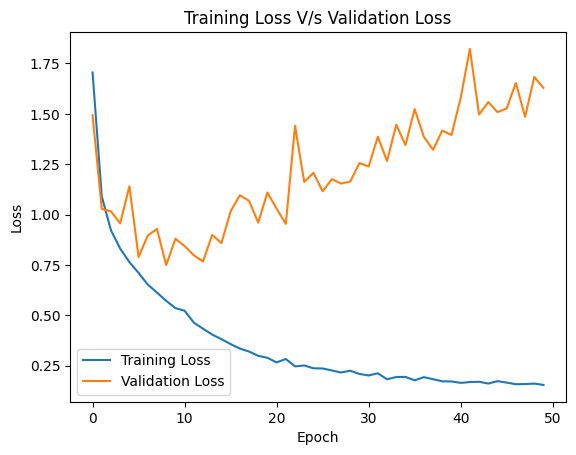

***************************************************************************************************************************************************************************************************
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0525 - accuracy: 0.9819
Training Loss: 0.05248551070690155
Training Accuracy: 0.9818500280380249
***************************************************************************************************************************************************************************************************
313/313 [==============================] - 1s 3ms/step - loss: 1.6289 - accuracy: 0.7504
Validation Loss: 1.6288666725158691
Validation Accuracy: 0.7504000067710876
***************************************************************************************************************************************************************************************************


In [18]:
#Compile
model3.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

#Checkpointing the best model.
checkpoint = ModelCheckpoint('myBestModel3.A11', save_best_only=True, monitor='val_loss', mode='min', verbose=0)

#fitting the model
history = model3.fit(x_train, y_train_c, batch_size=64, epochs=50, verbose = 0, validation_data = (x_val, y_val_c), callbacks = [checkpoint])

#Plotting the losses
plot_curves(history)
print("***"*65)
#evaluating the model and obtaining the training and the testing losses and accuracy's
train_scores = model3.evaluate(x_train, y_train_c)
print("Training Loss:", train_scores[0])
print("Training Accuracy:", train_scores[1])
print("***"*65)
val_scores = model3.evaluate(x_val, y_val_c)
print("Validation Loss:", val_scores[0])
print("Validation Accuracy:", val_scores[1])
print("***"*65)

# **I. What do you observe from the training loss in both steps (e) and (h)? Explain.**
In step e, without batch normalization, the training loss is impressively low, accompanied by high training accuracy. However, this apparent perfect fit to the training data is indicative of overfitting, as evidenced by the considerable difference between the training and validation losses. Despite achieving high accuracy on the training set, the model struggles to generalize to unseen validation data, resulting in poorer performance.

In step h, with batch normalization, although the training loss is slightly higher compared to the previous step, the training accuracy remains approximately the same, which is high. However, the validation loss is notably lower, indicating improved generalization capability. Though the batch size is increased and the learning rate is increased to 0.01, we can see the training curve loss is as it is without any fluctuations or deviations. The validation loss is lower with batch normalization (1.6289 compared to 1.6618 in the model 1), indicating improved generalization to unseen data. The validation accuracy is slightly higher with batch normalization (0.7504 compared to 0.7466 in the model1), further supporting the notion of improved generalization. While the addition of batch normalization helps alleviate overfitting to some extent, the presence of fluctuations in the validation loss graph suggests that the model is working better with the unknown data, and it also needs further optimization to enhance the model's stability even more.

In summary, in step e, the absence of batch normalization leads to overfitting, with the model tightly fitting the training data but performing poorly on validation data. In step h, the introduction of batch normalization mitigates overfitting to some extent, resulting in improved performance, although fluctuations in the validation loss graph indicate potential areas for refinement.